In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/Thomas101Shen/Dynamic_hedging/refs/heads/main/Option_SPX.csv'
data = pd.read_csv(url)
data = data.iloc[0:50]

print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

X = data[['Moneyness', 'TTM', 'D_BS']]
y = data[['Target']]

print(f'\n\nFeatures:\n {X.describe()} \n\n\n Test data:\n {y.describe()}')

(50, 14)
(50, 14)
         Date  ID  Days until next hedge        S  Dividend        C_BS  \
0  2024-10-09   1                      1  5792.04    1.3255  347.319191   
1  2024-08-12   3                      1  5344.39    1.4375   65.911689   
2  2024-08-05   5                      1  5186.33    1.4816   29.540325   
3  2024-11-15   1                      3  5870.62    1.3163  351.552064   
4  2024-09-17   6                      1  5634.58    1.3645   46.314393   

       D_BS   C_mkt  D_Blm        R  TTM  Moneyness  D_Optimal    Target  
0  0.630024  357.80  0.642  4.78852  163      92.04   0.385249 -0.244775  
1  0.227086   74.05  0.247  4.96403  221    -555.61   0.228776  0.001690  
2  0.111161   38.45  0.132  4.95853  228    -913.67  -0.159851 -0.271012  
3  0.685499  370.40  0.710  4.77039  126     170.62   0.377866 -0.307633  
4  0.185447   54.15  0.208  4.76338  185    -565.42   0.160314 -0.025133  


Features:
         Moneyness         TTM       D_BS
count   50.000000   50.0000

        Moneyness         TTM       D_BS
count   50.000000   50.000000  50.000000
mean  -174.217800  123.900000   0.426483
std    280.688017   59.009944   0.207186
min   -913.670000   18.000000   0.077941
25%   -381.125000   91.500000   0.255427
50%   -155.705000  126.500000   0.448373
75%     48.320000  164.500000   0.635672
max    332.380000  228.000000   0.792605

Skew: 
Moneyness   -0.647762
TTM         -0.186613
D_BS        -0.025333
dtype: float64

Kurtosis: 
Moneyness    0.204290
TTM         -0.852668
D_BS        -1.160388
dtype: float64


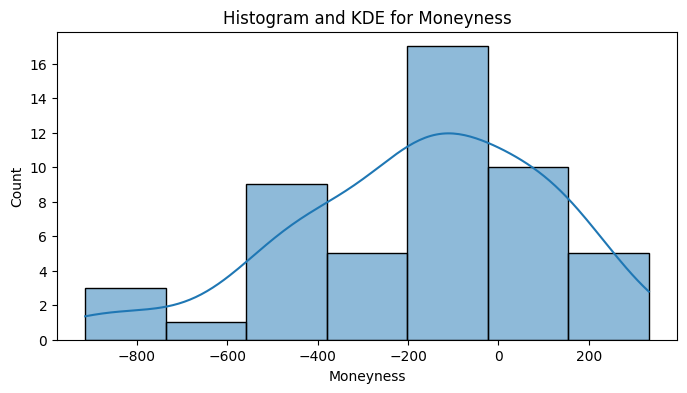

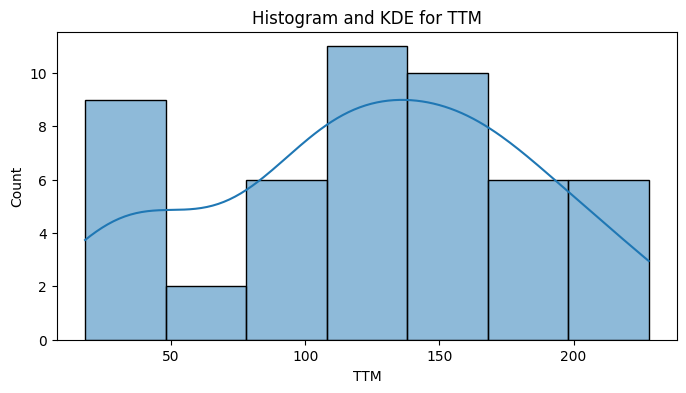

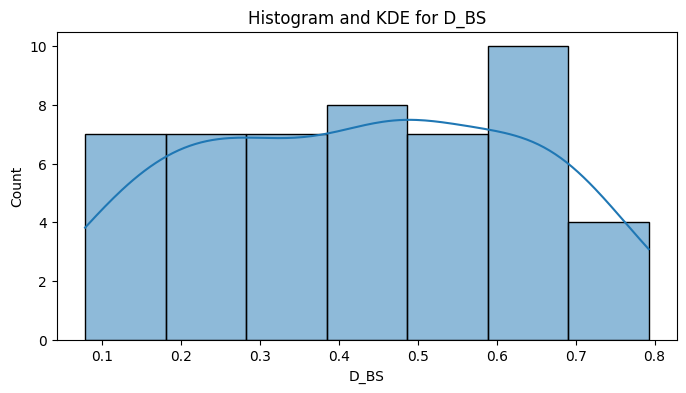

          Target
count  50.000000
mean   -0.499910
std     3.448409
min   -20.186809
25%    -0.186624
50%    -0.031119
75%     0.113140
max     5.332851

Skew: 
Target   -4.649063
dtype: float64

Kurtosis: 
Target    24.513207
dtype: float64


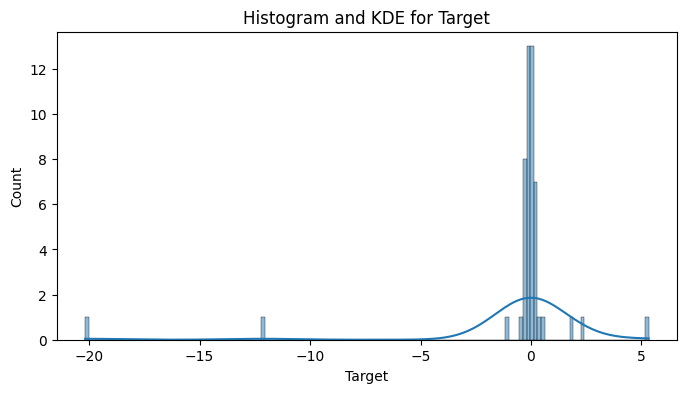

In [4]:
def describe_data(df):
    print(df.describe())
    print("\nSkew: ")
    print(df.skew())
    print("\nKurtosis: ")
    print(df.kurtosis())
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram and KDE for {column}')
        plt.show()

describe_data(X)
describe_data(y)

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# print(type(y_train_val))

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=True)

In [7]:
def plot_train_test(train, test):
    columns = train.columns.tolist()
    # print(train.min(), test.min(), train.max(), test.max())
    for column in columns:
        plt.hist(train[column], bins=30, alpha=0.5
                 , label=f'Training data for {column}')
        plt.hist(test[column], bins=30, alpha=0.5, label=f'Test data for {column}')
        plt.legend()
        plt.title(f'Distribution of {column}')
        plt.show()

# print(X_train.min())


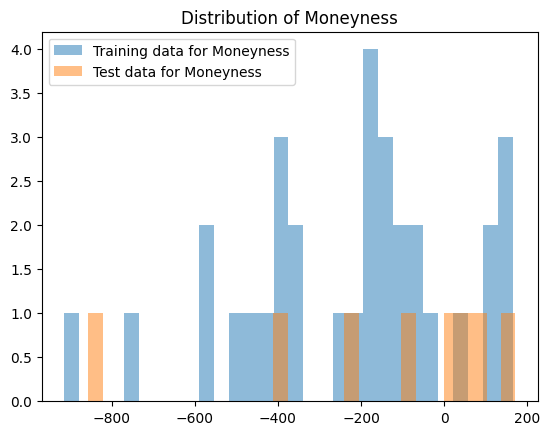

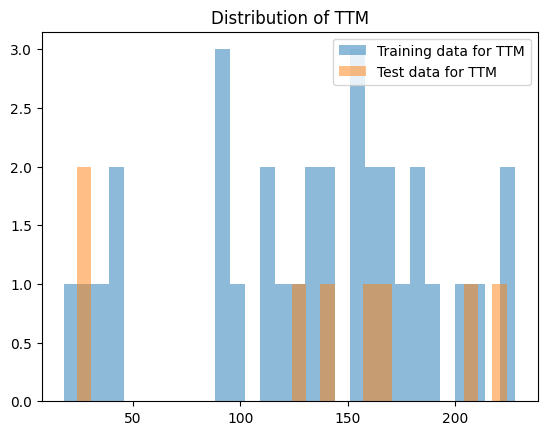

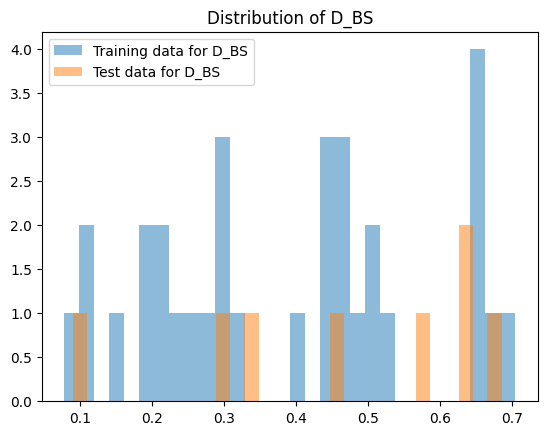

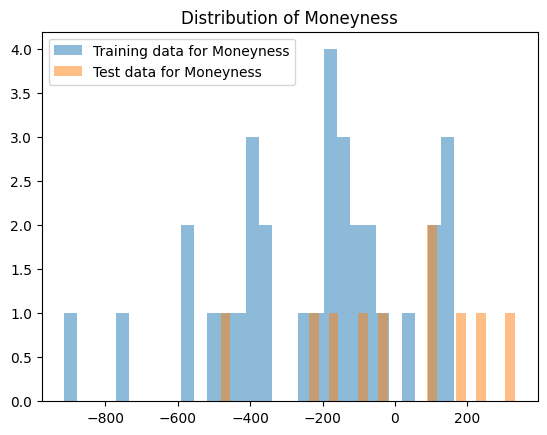

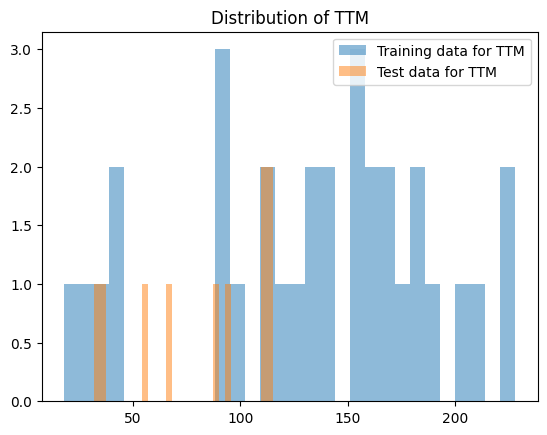

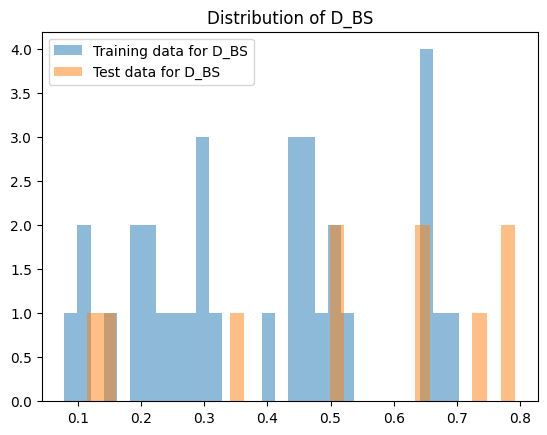

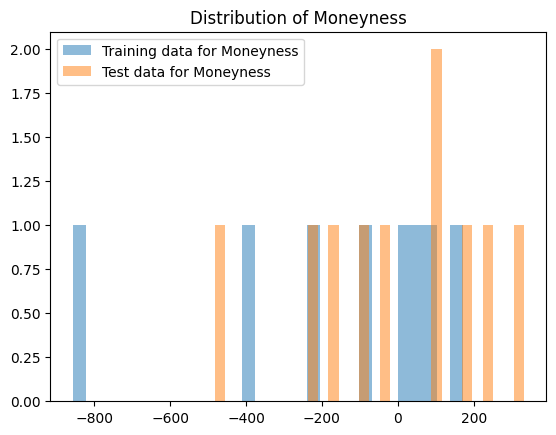

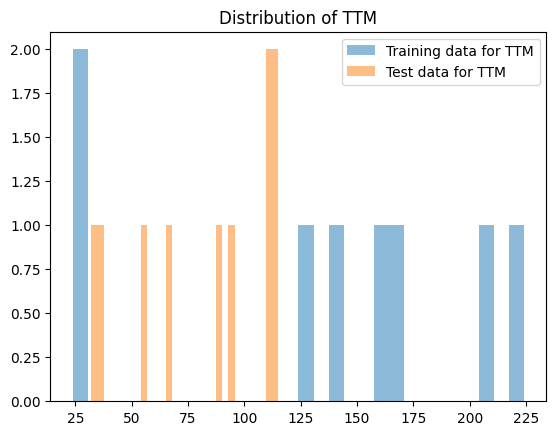

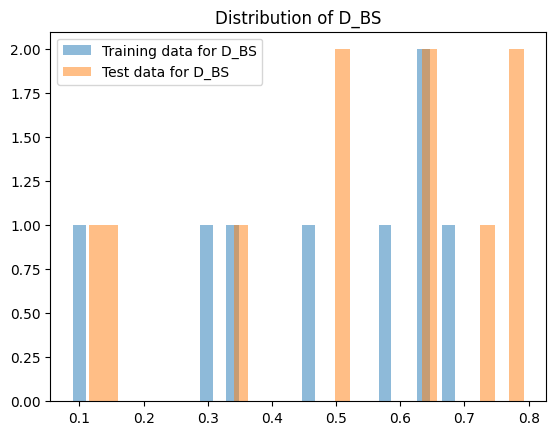

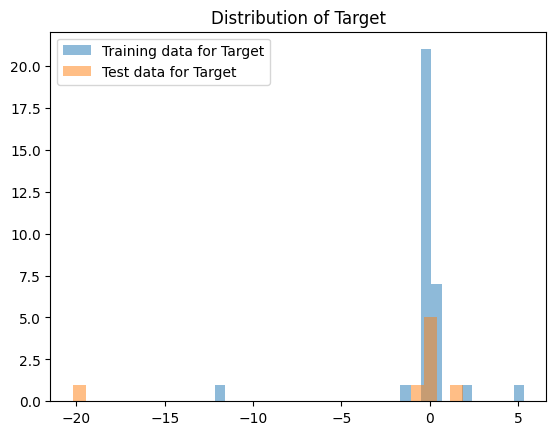

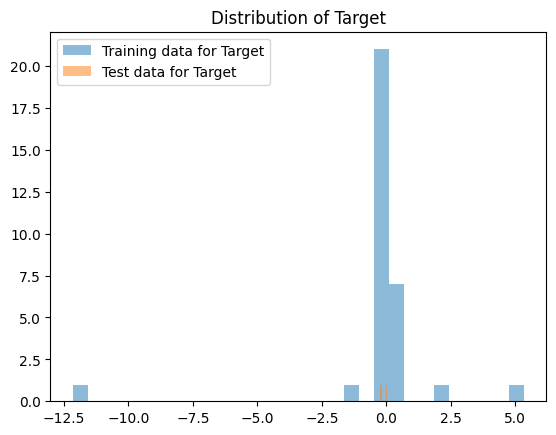

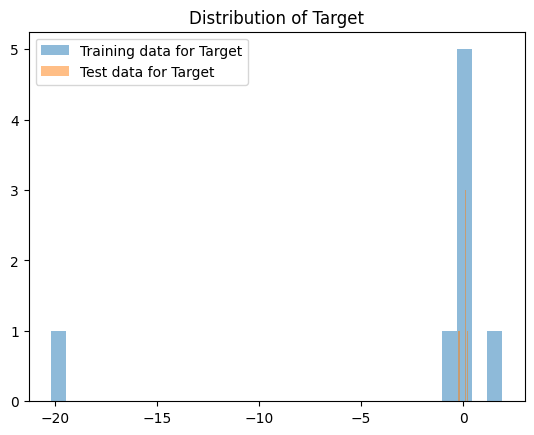

In [8]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [9]:
scaler = MinMaxScaler()


scaler.fit(X)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

feat_cols = ['Moneyness', 'TTM', 'D_BS']

X_train = pd.DataFrame(X_train, columns=feat_cols)
X_test = pd.DataFrame(X_test, columns=feat_cols)
X_val = pd.DataFrame(X_val, columns=feat_cols)

0.0
0.05125858403741611
Moneyness    0.0
TTM          0.0
D_BS         0.0
dtype: float64


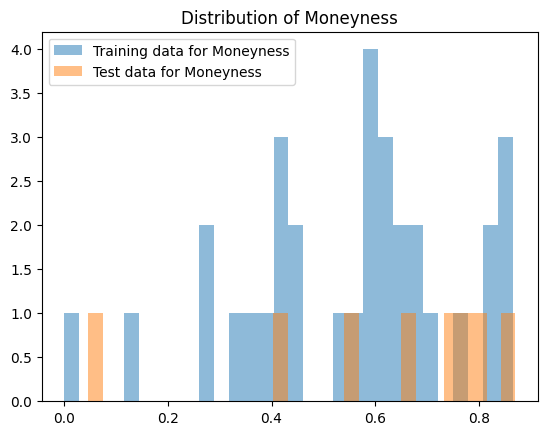

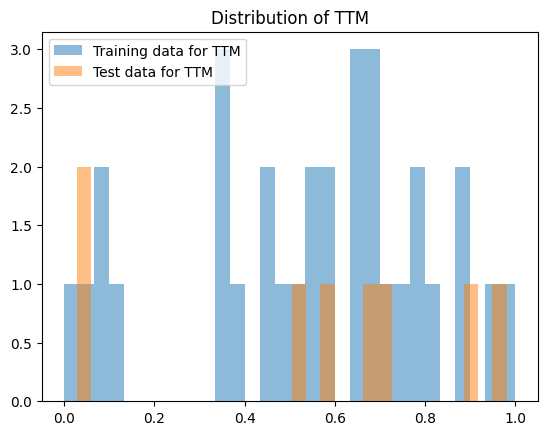

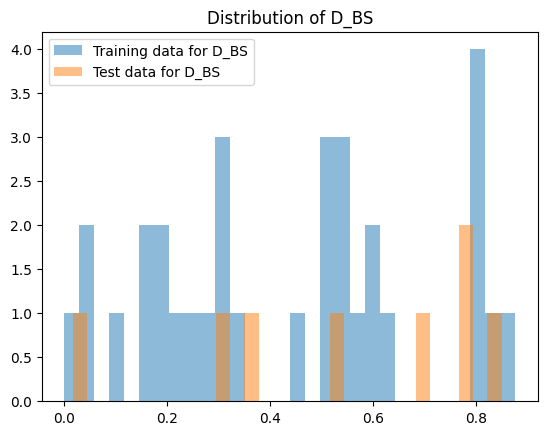

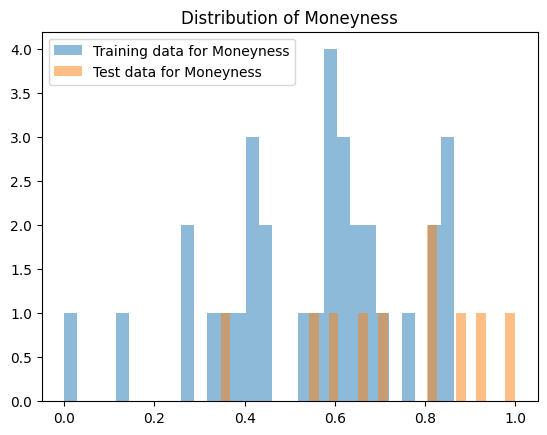

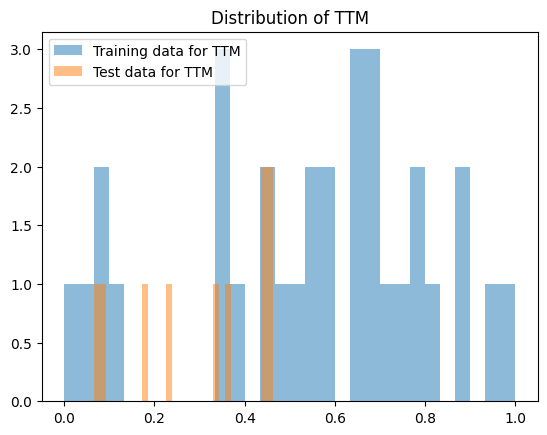

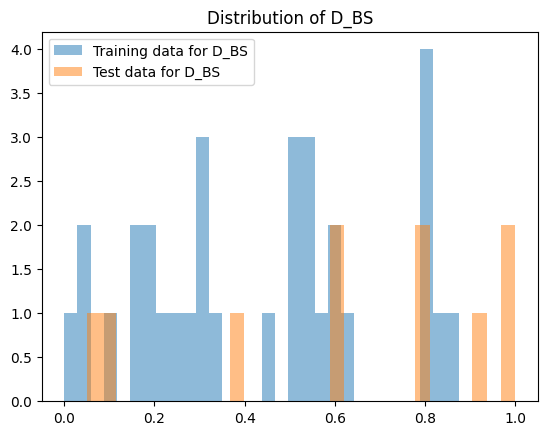

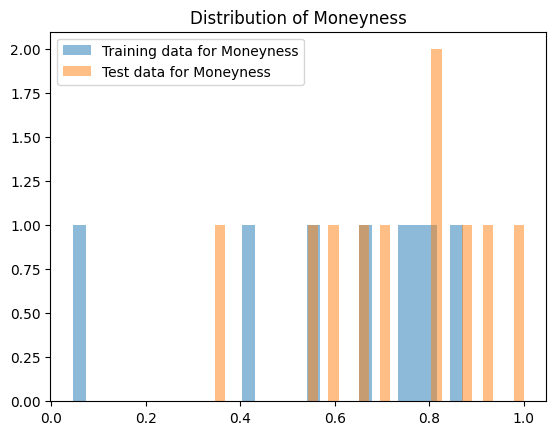

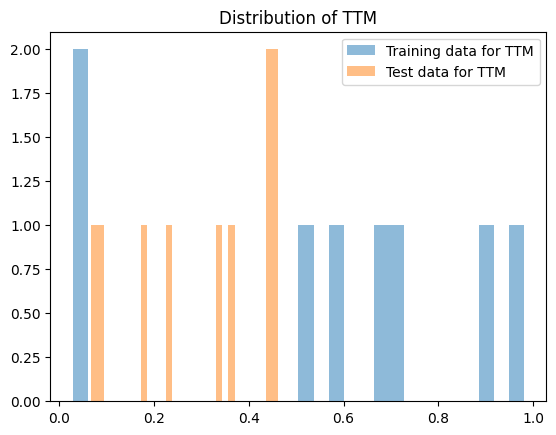

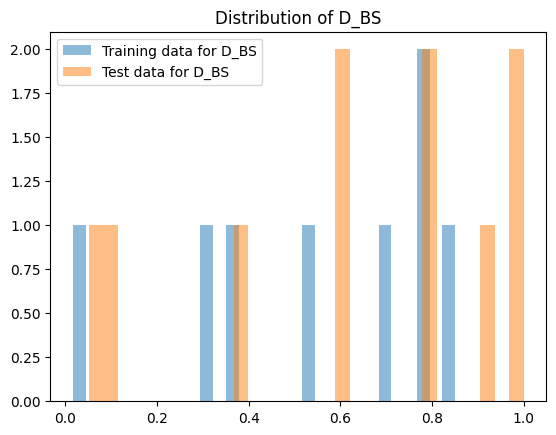

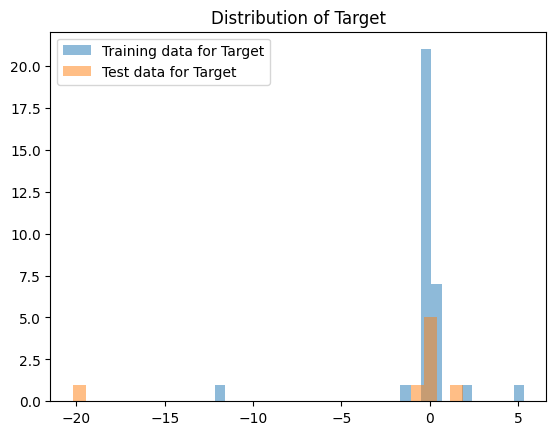

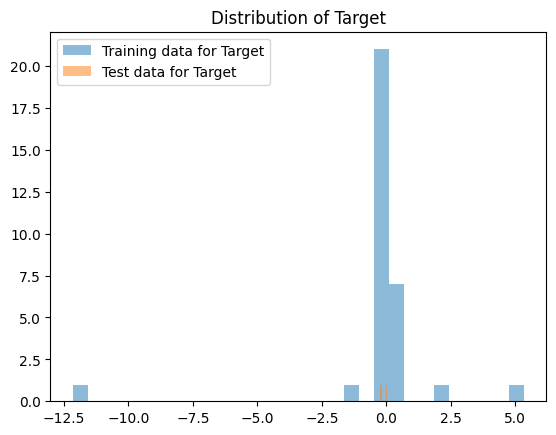

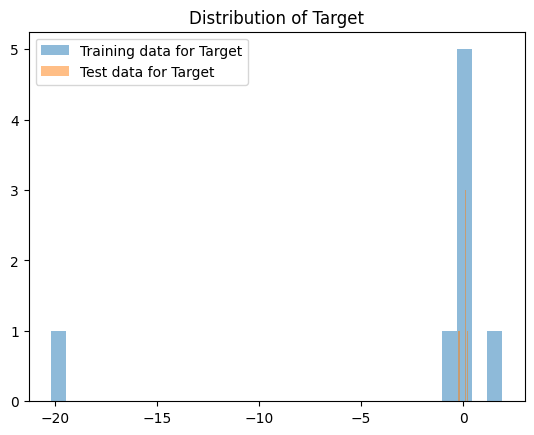

In [10]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [11]:
import torch.nn as nn
import torch.optim as optim


class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x


input_size = 3
hidden_size = 6
output_size = 1

In [12]:
X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
X_val = torch.tensor(X_val.values, dtype=torch.float)

y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)
y_val = torch.tensor(y_val.values, dtype=torch.float)

In [13]:
model = FNN(input_size, hidden_size, output_size)
loss_func = nn.MSELoss()
optimizer_mse = optim.Adam(model.parameters(), lr=0.01)

In [14]:
def train_model(model, epochs, loss_fun, optimizer):
    patience = 20
    best_val_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        predictions_train = model(X_train)
        loss_train = loss_func(predictions_train, y_train)
    
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    
        model.eval()
        with torch.no_grad():
            predictions_val = model(X_val)
            loss_val = loss_func(predictions_val, y_val)
    
        # Check for improvement
        if loss_val < best_val_loss:
            best_val_loss = loss_val
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stoppage")
                print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")
                break
                
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")

In [15]:
train_model(model, 1000, loss_func, optimizer_mse)

Epoch [5/1000], Training Loss: 5.6757, Validation Loss: 50.1916
Epoch [10/1000], Training Loss: 5.6633, Validation Loss: 50.1794
Epoch [15/1000], Training Loss: 5.6514, Validation Loss: 50.1779
Epoch [20/1000], Training Loss: 5.6375, Validation Loss: 50.1678
Epoch [25/1000], Training Loss: 5.6209, Validation Loss: 50.1609
Epoch [30/1000], Training Loss: 5.6022, Validation Loss: 50.0995
Epoch [35/1000], Training Loss: 5.5720, Validation Loss: 50.1231
Epoch [40/1000], Training Loss: 5.5360, Validation Loss: 50.1801
Epoch [45/1000], Training Loss: 5.4951, Validation Loss: 50.2051
Early stoppage
Epoch [50/1000], Training Loss: 5.4534, Validation Loss: 50.3580


In [16]:

#     optimizer.step()
def train_batch_model(model, epochs, batch_size, loss_func, optimizer):
    patience = 20
    wait = 0
    best_val_loss = float('inf')
    for epoch in range(epochs):
        for start in range(0, len(X_train), batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
        
            # Forward pass
            predictions_train = model(X_batch)
            loss_train = loss_func(predictions_train, y_batch)
        
            # Backward pass
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
    
        model.eval()
        with torch.no_grad():
            predictions_val = model(X_val)
            loss_val = loss_func(predictions_val, y_val)
    
        # Check for improvement
        if loss_val < best_val_loss:
            best_val_loss = loss_val
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stoppage")
                print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")
                break
                
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")

In [17]:
batch_model = FNN(input_size, hidden_size, output_size)
optimizer_mse_batch = optim.Adam(batch_model.parameters(), lr=0.01)

In [18]:
train_batch_model(batch_model, 1000, 30, loss_func, optimizer_mse_batch)

Epoch [5/1000], Training Loss: 0.2633, Validation Loss: 51.0144
Epoch [10/1000], Training Loss: 0.2002, Validation Loss: 51.4964
Epoch [15/1000], Training Loss: 0.1752, Validation Loss: 51.6117
Epoch [20/1000], Training Loss: 0.1676, Validation Loss: 51.5861
Early stoppage
Epoch [21/1000], Training Loss: 0.1643, Validation Loss: 51.5923


In [19]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = loss_func(predictions, y_test)
    print(f"No batch MSE: {test_loss.item():.4f}")
    
batch_model.eval()
with torch.no_grad():
    predictions = batch_model(X_test)
    test_loss = loss_func(predictions, y_test)
    print(f"30 batch MSE: {test_loss.item():.4f}")

No batch MSE: 0.0527
30 batch MSE: 0.0280


In [20]:
mse_greeks = (data['Target']**2).mean()
print(f"Standard greek MSE: {mse_greeks}")

Standard greek MSE: 11.903602364678882
